<a href="https://colab.research.google.com/github/JoaquinV13/APRENDIZAJE_AUTOMATICO_23_24/blob/main/Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grupo : A09

Integrantes : Joaquin Manuel Vilaplana López, Adrián García-Arroba Romero

# **INTRODUCCIÓN**

El objetivo de esta práctica es crear 8 casos diferentes de redes neuronales que entrenaremos con un conjunto de 60k imágenes de ropa extraídas de Zalando.
Las prendas de ropa se clasificarán en 10 tipos que posteriormente mostraremos.

Compararemos y analizaremos los resultados de cada uno de los casos de redes neuronales teniendo en cuenta resultados de precisión durante el entrenamiento y durante la fase de prueba. Posteriormente, se explicará que motivos llevan a un tipo de red u otro a ser mejor en cuanto a al precisión en este tipo de problemas.

Por otro lado, se compararán dos casos frente a sus originales donde el entrenamiento original se lleva a cabo con cinco épocas y después con 25. Además, se cotejarán algunos datos entre diferentes casos de forma gráfica.

Por último, se usará en el caso 3 de red neuronal otro tipo de función de perdida y optimizador y se analizarán los resultados frente al caso original.

In [1]:
# Se muestran los 10 casos de prendas de ropa.

import pandas as pd

# Se crea un DataFrame.
datos1 = {'Class': ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']}

df1 = pd.DataFrame(datos1)

# Se imprime en pantalla el DataFrame en forma de tabla.
display(df1)

,Class
0,T-shirt/top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag
9,Ankle boot


In [2]:
# Se muestran los 8 casos de redes neuronales.

import pandas as pd

datos2 = {
    'CASO': range(1, 9),
    'Neuronas_capa_1': [10] * 4 + [512] * 4,
    'Función de activación': ['relu'] * 2 + ['sigmoid'] * 2 + ['relu'] * 2 +
     ['sigmoid'] * 2,
    'Optimizador': ['sgd', 'rmsprop'] * 4
}

df2 = pd.DataFrame(datos2)

# Se configura la columna 'CASO' como el índice del DataFrame.
df2.set_index('CASO', inplace=True)
df2

,Neuronas_capa_1,Función de activación,Optimizador
CASO,,,
1,10,relu,sgd
2,10,relu,rmsprop
3,10,sigmoid,sgd
4,10,sigmoid,rmsprop
5,512,relu,sgd
6,512,relu,rmsprop
7,512,sigmoid,sgd
8,512,sigmoid,rmsprop


# **DESARROLLO**

In [3]:
# Importamos la librería Keras.

import tensorflow as tf
from tensorflow import keras
print(tf.__version__) # Versión tensorflow superior a 2.0.0.

2.13.0


Cargamos los datos que vamos a utilizar como set de entrenamiento, validación y de test. El set consiste en 70k imágenes de prendas de ropa cada una perteneciente a una de las 10 categorías.

In [4]:
# Importamos el set.

from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Se hacen las siguientes asignaciones porque posteriormente haremos uso de las
# etiquetas de entreno y test cuando éstas no se encuentren en one hot encoding.
y_train = train_labels
y_test = test_labels

4422102/4422102 [==============================] - 0s 0us/step


Comprobamos que los datos extraídos tienen la dimensión esperada.

In [5]:
print('Tamaño imágenes de entrenamiento',train_images.shape)
print('Tamaño imágenes de test',test_images.shape)


Tamaño imágenes de entrenamiento (60000, 28, 28)
Tamaño imágenes de test (10000, 28, 28)


Efectivamente, tenemos un total de 70k imágenes las cuales 60k son de entrenamiento y 10k son de prueba, todas ellas con una resolución de 28x28 píxeles. A cada píxel le corresponde un número del 0 al 255 que hace referencia a qué tan blanco o negro es. Siendo el 0 completamente negro y el 255 blanco puro. Al haber 784 píxeles en una matriz de 28x 28, la función de keras, keras.layers.Flatten(), guarda cada uno de los valores de la matriz en una lista. Flatten se traduce al español como "aplanar", se podría decir que se aplana una matriz 28x28 en una lista de 784 valores.


Acontinuación, inicializaremos los 8 casos de redes neuronales enunciados en la práctica.

### Apartado 1:



CASO 1:

Número de neuronas 10, función de activación relu y optimizador sgd.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 9s 6ms/step - loss: 1.9111 - accuracy: 0.3412
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 1.1195 - accuracy: 0.6500
Epoch 3

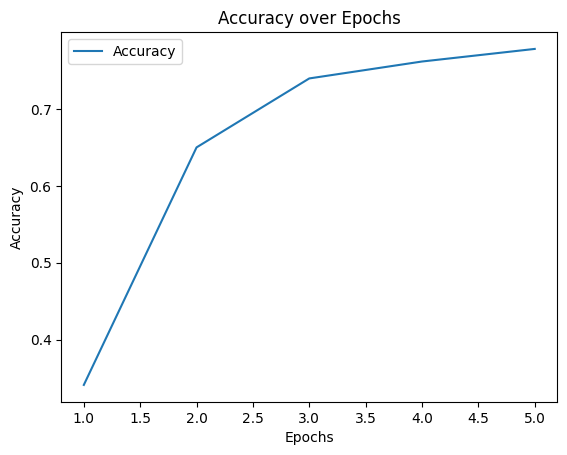



CASO 2:

Número de neuronas 10, función de activación relu y optimizador rmsprop.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.7989 - accuracy: 0.7230
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5152 - accuracy: 0.8232
E

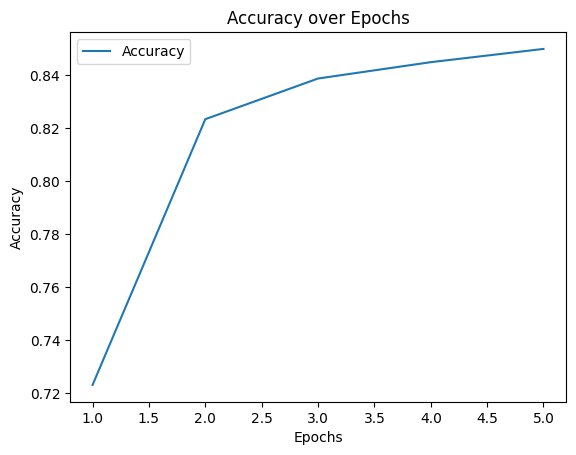



CASO 3:

Número de neuronas 10, función de activación sigmoid y optimizador sgd.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 2.1034 - accuracy: 0.2377
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 1.8116 - accuracy: 0.4511
Ep

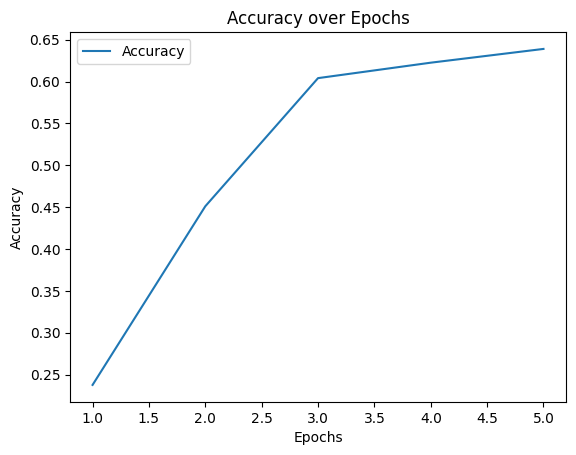



CASO 4:

Número de neuronas 10, función de activación sigmoid y optimizador rmsprop.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 1.4755 - accuracy: 0.6057
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.8641 - accuracy: 0.741

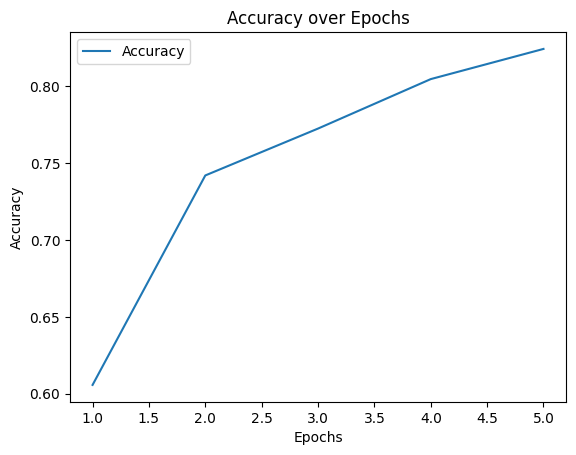



CASO 5:

Número de neuronas 512, función de activación relu y optimizador sgd.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.0207 - accuracy: 0.6927
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6584 - accuracy: 0.7898
Ep

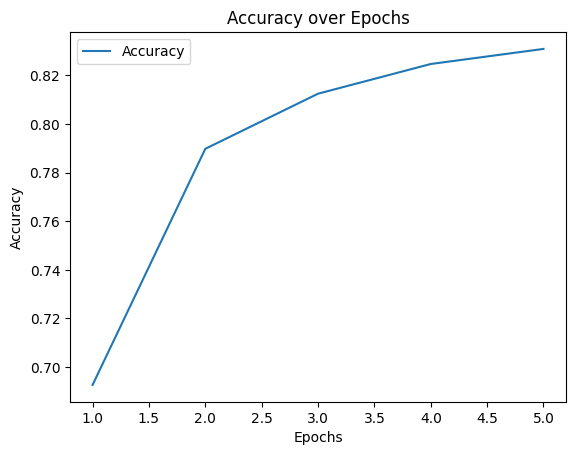



CASO 6:

Número de neuronas 512, función de activación relu y optimizador rmsprop.

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5608 - accuracy: 0.8015
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.3847 - accuracy: 0.858

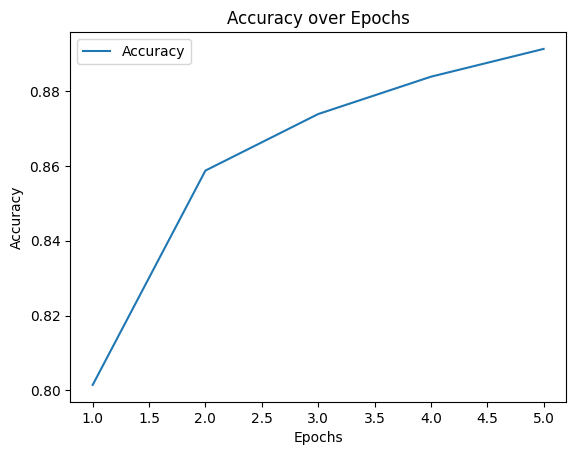



CASO 7:

Número de neuronas 512, función de activación sigmoid y optimizador sgd.

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.7063 - accuracy: 0.5876
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 1.1343 - accuracy: 0.7085

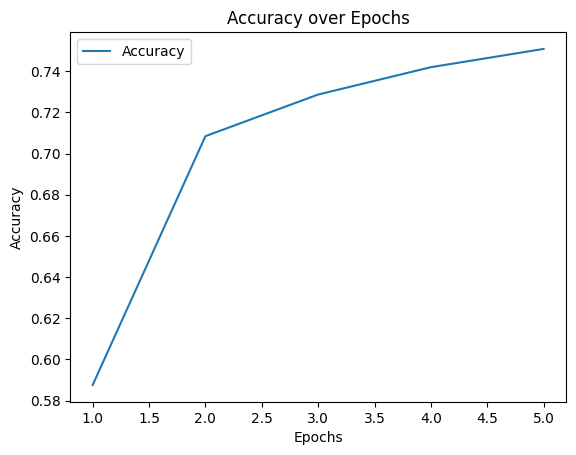



CASO 8:

Número de neuronas 512, función de activación sigmoid y optimizador rmsprop.

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6140 - accuracy: 0.7853
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4497 - accuracy: 0.

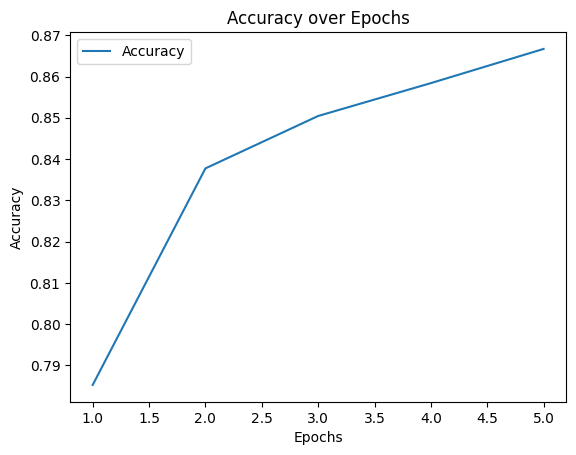

In [6]:
# Importamos modelos y capas.

import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.layers import Flatten
from keras.utils import to_categorical

# Establecemos los nombres de función de activación
# y el optimizador que combinaremos para cada caso.

fa = ['relu','sigmoid'] # Función de activación.
opt = ['rmsprop','sgd'] # Optimizador.
ne = [10, 512] # Número de neuronas.

# Redimensionamos los datos de entrada en una matriz de dimensión 2.

train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# Normalizamos los valores de los píxeles, tomarán valores del 0 al 1 en vez del
# 0 al 255.

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Se establecen las etiquetas del set en one hot encoding, vectores binarios que
# representan el tipo de prenda.

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Variables que se usarán para llamar a las posiciones correctas de las listas,
# funcion de activación y número de neuronas.

a = 0
b = 0
c = 0 # Contador.

# Probamos los 8 casos de redes neuronales.

for i in range(1,9):

  if i <= 4:
      a = 0
  else:
      a = 1

  print(f'\n\nCASO {i}:\n')
  print(f'Número de neuronas {ne[a]}, función de activación {fa[b]}',
        f'y optimizador {opt[i%2]}.\n')

  locals()['net' + str(i)] = models.Sequential()# Creamos un modelo secuencial.

  # Capa del tipo flatten que aplana los datos de entrada en un vector.
  locals()['net' + str(i)].add(Flatten(input_shape = (28 * 28,)))

  # Añadimos una capa densa de neuronas con un número de 10 o 512 de las mismas
  # y una función de activación según el tipo de caso.
  locals()['net' + str(i)].add( layers.Dense(ne[a], activation = fa[b]))

  # Creamos la capa de 10 neuronas de salida con función de activación softmax
  # ya que buscamos que los resultados que nos devuelva cada neurona sea la
  # probabilidad de haber reconocido un tipo de prenda u otro, 10 neuronas por
  # cada tipo de prenda. La suma de los valores de las neuronas debe ser igual
  # a uno.
  locals()['net' + str(i)].add( layers.Dense(10, activation = 'softmax') )

  # Función que devuelve el número de parámetros utilizados en cada red
  # neuronal.
  locals()['net' + str(i)].summary()

  # Función que llama al optimizador y a la función de pérdida que ajustará los
  # pesos, solo se tendrá en cuenta las predicciones correctas, métrica de
  # precisión.
  locals()['net' + str(i)].compile(optimizer = opt[i%2],
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

  # Se entrena a la red neuronal con las imágenes de entrenamiento junto con sus
  # respectivas etiquetas, se ajustan los pesos cada 128 imágenes. Una vez
  # se ha entrenado con todas las imágenes, el proceso se repite 5 veces.
  history = locals()['net' + str(i)].fit(train_images, train_labels, epochs = 5,
                             batch_size = 128)

  # Se extrae la curva de precisión.
  accuracy = history.history['accuracy']

  # Gráfico de precisión.
  plt.figure()
  plt.plot(range(1, len(accuracy) + 1), accuracy, label='Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Accuracy over Epochs')
  plt.legend()
  plt.show()

  c += 1

  if c == 2:
    if b == 1:
      b = 0
    else:
      b = 1
    c = 0


**Resultados**:

Analizando primero los resultados para las redes de 10 neuronas, se ajusta mejor a los datos de prueba aquella red neuronal que hace uso de la función de activación 'relu' y el optimizador 'rmsprop', precisión del 85%, siguiéndole muy de cerca la red neuronal con la función 'sigmoid' y mismo optimizador, precisión del 82%. Además, la red del caso 1 es la tercera con mejor precisión, cercana al 80%.

El gran declive de precisión se aprecia cuando se hace uso de la función de activación 'sigmoid' y el optimizador 'sgd' con unos resultados cercanos al 60% de precisión.

Por consiguiente, la combinación de la función 'sigmoid' y el optimizador 'sgd' es la peor para este tipo de problemas, además, la combinación de estos con cualquier otro tipo de función u optimizador tampoco da los mejores resultados. Esto es debido a que esta función de activación tiene un rango del 0 al 1 y cuando tiene una entrada masiva de datos la función se satura en el 1 que si se suma con el optimizador 'sgd', método del gradiente descendente, los gradientes resultantes serán muy pequeños y la red tendrá más dificultad para converger.

Analizando la precisión para las redes de 512 neuronas, los resultados son parecidos a las redes de 10 neuronas en cuanto a qué método es más eficaz, la red que tiene función de activación 'relu' y optimizador 'rmsprop'. Sin embargo, en general, la precisión aumenta para todos los casos comparados con aquellos de 10 neuronas. Esto es debido a que cuan mayor número de neuronas la red tiene más capacidad para jugar con combinaciones de pesos y así ajustarse mejor.

En cualquiera de los dos casos, ya sean 10 o 512 neuronas, el método con función de activación 'relu' y optimizador 'rmsprop' es el mejor porque 'rmsprop' converge a un mínimo de forma más rápida que 'sgd' y la 'relu' es mucho mejor que la 'sigmoid' cuando se quieren clasificar más de dos objetos ya que primero de todo, computacionalmente es más rápida, es simplemente una condición a diferencia de la 'sigmoid' que es un exponente y segundo, porque en 'sigmoid' destaca un desvanecimiento del gradiente principalmente por lo que se comentó anteriormente, la derivada tenderá a cero si se introducen muchos datos, en cambio, relu, una vez activada, seguirá una constante 1 en su derivada.

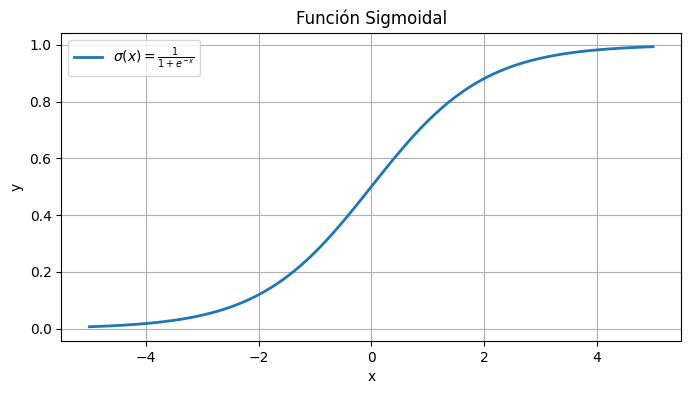

In [7]:
# Representación de una función sigmoidal.

import matplotlib.pyplot as plt
import numpy as np

# Se define la función sigmoidal.

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Valores para x.

x = np.linspace(-5, 5, 100)

# Se calcula y.

y = sigmoid(x)

# Se configura el tamaño de la figura.

plt.figure(figsize=(8, 4))

# Se dibuja la función.

plt.plot(x, y, label=r'$\sigma(x) = \frac{1}{1 + e^{-x}}$', linewidth=2)
plt.title('Función Sigmoidal')
plt.xlabel('x')
plt.ylabel('y')

# Se muestra el gráfico.

plt.legend()
plt.grid()
plt.show()

### Apartado 2:

La función summary devuelve el número de parámetros que se están analizando en
cada una de las redes neuronales.

El número de pramateros se calcula teniendo en cuenta el tipo de modelo, el
tipo de capa y el número de neuronas en cada capa. Para todos los casos el
modelo utilizado es un modelo secuencial, es decir, no hay ningún bucle, y las capas son densas, cada neurona de la primera capa está conectada con cada neurona de las 10 en la capa de la salida. Teniendo en cuenta que cada relación
es considerada un parámetro se tiene, número de datos de entrada, lista de
784 elementos cada uno relacionado con cada neurona de la primera capa, la primera capa relacionada de forma densa con la segunda y cada neurona tiene un umbral, entonces el calculo es, 784x(número de neuronas de la primera capa) + (número de neuronas de la primera capa)x10 + número de neuronas de la primera capa (umbral) + 10(umbral).

En los primeros 4 casos, 10 neuronas en la primera capa, se tiene un cálculo de 784x10 + 10x10 + 10 + 10 = 7960 número de parámetros.

En el caso de 512 neuronas, 784x512 + 512x10 + 10 + 512 = 407050 número de parámetros.

### Apartado 3:

In [8]:
a = 0

# Probamos los casos 2 y 7 con un entreno de 25 épocas.

for i in [2,7]:

  if i <= 4:
      a = 0
  else:
      a = 1

  print(f'\n\nCASO {i}:\n')
  print(f'Número de neuronas {ne[a]}, función de activación {fa[i%2]}',
        f'y optimizador {opt[i%2]}.\n')

  locals()['net' + str(i)] = models.Sequential()# Creamos un modelo secuencial.

  # Añadimos una capa densa de neuronas con un número de 10 o 512 de las mismas
  # y una función de activación según el tipo de caso.
  locals()['net' + str(i)].add( layers.Dense(ne[a], activation = fa[i%2],
                                   input_shape = (28 * 28,)) )

  # Creamos la capa de 10 neuronas de salida con función de activación softmax
  # ya que buscamos que los resultados que nos devuelva cada neurona sea la
  # probabilidad de haber reconocido un tipo de prenda u otro, 10 neuronas por
  # cada tipo de prenda. La suma de los valores de las neuronas debe ser igual
  # a uno.
  locals()['net' + str(i)].add( layers.Dense(10, activation = 'softmax') )

  # Función que devuelve el número de parámetros utilizados en cada red
  # neuronal.
  locals()['net' + str(i)].summary()

  # Función que llama al optimizador y a la función de pérdida que ajustará los
  # pesos, solo se tendrá en cuenta las predicciones correctas, métrica de
  # precisión.
  locals()['net' + str(i)].compile(optimizer = opt[i%2],
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

  # Se entrena a la red neuronal con las imágenes de entrenamiento junto con sus
  # respectivas etiquetas, se ajustan los pesos cada 128 imágenes. Una vez
  # se ha entrenado con todas las imágenes, el proceso se repite 5 veces.
  locals()['net' + str(i)].fit(train_images, train_labels, epochs = 25,
                             batch_size = 128)




CASO 2:

Número de neuronas 10, función de activación relu y optimizador rmsprop.

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                7850      
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
469/469 [==============================] - 2s 3ms/step - loss: 0.8292 - accuracy: 0.7159
Epoch 2/25
469/469 [==============================] - 1s 3ms/step - loss: 0.5125 - accuracy: 0.8234
Epoch 3/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4721 - accuracy: 0.8362
Epoch 4/25
469/469 [===========

**Resultados**:

Cuando se entrena el caso 2 con cinco épocas se llega a una precisión cercana al 85% mientras que si se hacen veinticinco épocas supera el 87% de precisión.
Para el caso 7 ocurre lo mismo, la precisión sube, cuando se entrena con cinco épocas tiene una precisión cercana al 75% y con veinticinco superior al 82%.

A pesar de haber mejorado la precisión con que las redes aciertan con los datos de entrenamiento esto puede llevar a un sobreentrenamiento, cada vez la red neuronal es capaz de reconocer mejor los datos de entrenamiento y peor los de prueba, ello lleva a perder generalización. Siempre es preciso encontrar un equilibrio para que la red sea capaz de reconocer gran parte de los patrones de los sets de entreno y los de prueba. Que la red tenga la suficiente generalización como para que reconozca datos que nunca a visto antes con la mejor precisión posible.

### Apartado 4:

In [9]:
c = 0

for i in range(1,9):

  if i <= 4:
      a = 0
  else:
      a = 1

  print(f'\n\nCASO {i}:\n')
  print(f'Número de neuronas {ne[a]}, función de activación {fa[b]}',
        f'y optimizador {opt[i%2]}.\n')

  # Función que evalua la precisión con que la red neuronal reconoce el tipo de
  # prenda de el conjunto de datos de prueba.
  test_loss, test_acc = locals()['net' + str(i)].evaluate(test_images,
                                                          test_labels)
  print('\nPérdida en la prueba:', test_loss)
  print('Precisión en la prueba:', test_acc)

  c += 1

  if c == 2:
    if b == 1:
      b = 0
    else:
      b = 1
    c = 0



CASO 1:

Número de neuronas 10, función de activación relu y optimizador sgd.

313/313 [==============================] - 1s 3ms/step - loss: 0.6392 - accuracy: 0.7746

Pérdida en la prueba: 0.6392453908920288
Precisión en la prueba: 0.7746000289916992


CASO 2:

Número de neuronas 10, función de activación relu y optimizador rmsprop.

313/313 [==============================] - 1s 4ms/step - loss: 0.4258 - accuracy: 0.8494

Pérdida en la prueba: 0.42575663328170776
Precisión en la prueba: 0.849399983882904


CASO 3:

Número de neuronas 10, función de activación sigmoid y optimizador sgd.

313/313 [==============================] - 1s 4ms/step - loss: 1.2956 - accuracy: 0.6384

Pérdida en la prueba: 1.2955565452575684
Precisión en la prueba: 0.6384000182151794


CASO 4:

Número de neuronas 10, función de activación sigmoid y optimizador rmsprop.

313/313 [==============================] - 1s 4ms/step - loss: 0.5330 - accuracy: 0.8158

Pérdida en la prueba: 0.5329777002334595
Precisión

**Resultados**:

Ordenando los casos por pérdida en la prueba (de menor a mayor) o por precisión en la prueba (de mayor a menor) se obtiene el mismo orden: 6-8-2-4-5-1-7-3.
A simple vista destaca el caso 6, puesto que con 512 neuronas en la primera capa, la función de activación 'relu' y optimizador 'rmsprop' es el más efectivo para este problema. De manera contraria el caso 3 con 10 neuronas, 'sigmoid' y 'sgd' es la menos efectiva.

Se ve claramente como son más precisos los casos con 512 neuronas que con 10. Simplemente basta con comparar la precisión de los casos 5 y 1 (misma función de activación y optimizador pero diferentes neuronas). Lo mismo sucede con los casos 8 y 4.

Con la función de activación se puede comparar de la misma forma. Las parejas de casos 1-3, 2-4, 5-7 y 6-8 tienen el mismo número de neuronas y optimizador pero diferente función de activación. En todos los casos relu es más efectiva que sigmoid.

La precisión de los optimizadores se ve de forma muy clara. En el orden (de mayor a menor) 6-8-2-4-5-1-7-3 los números pares son los casos que usan 'rmsprop' mientras que los impares 'sgd'. Se puede concluir que 'rmsprop' es más efectivo, ya que los cuatro primeros casos son números pares.

### Apartado 5 y 6:

A continuación, se presentan las dos funciones subidas a canvas para poder resolver los apartados 5 y 6. Al salir algún warning se han modificado mínimamente.

In [10]:
# Se define la variable class_names.
class_names = datos1['Class']

def plot_image(i, predictions_array, true_label, img):

    # Se asignan los valores de entrada a las variables locales.
    predictions_array, true_label, img = predictions_array, np.argmax(true_label[i]), img[i]

    # Gráfico
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # Se reconfigura la imagen.
    img = img.reshape(28, 28)    # Línea añadida a la función.
    plt.imshow(img, cmap=plt.cm.binary)

    # Se determina la etiqueta
    predicted_label = np.argmax(predictions_array)

    # Se establece un color según si la predicción es correcta (o no).
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    # Se muestra la predicción, probabilidad y la clase verdadera.
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):

    # Se asignan los valores de entrada a las variables locales.
    predictions_array, true_label = predictions_array, np.argmax(true_label[i])

    # Gráfico.
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])

    # Se resaltan de colores las etiquetas.
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


Ahora se va a presentar una función que simplemente muestra las 10 primeras imágenes en pantalla.

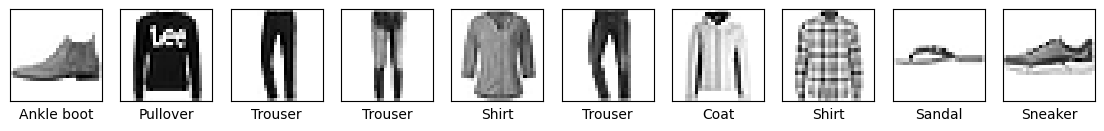

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Función para mostrar las primeras 10 imágenes de prueba.
def ver_imagenes(images, labels, class_names):
    plt.figure(figsize=(14, 2))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])

# Se llama a la función para mostrar las primeras 10 imágenes de prueba.
ver_imagenes(test_images, np.argmax(test_labels, axis=1), class_names)
plt.show()


El ejercicio 5 pide analizar según los 8 modelos diferentes la imagen número 6. El índice será 5 (puesto que la primera imagen es [0]).

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 44ms/step


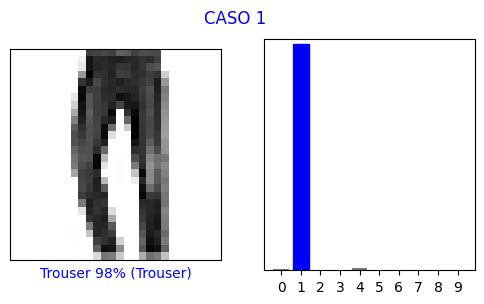

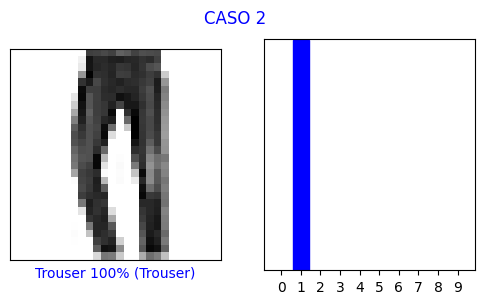

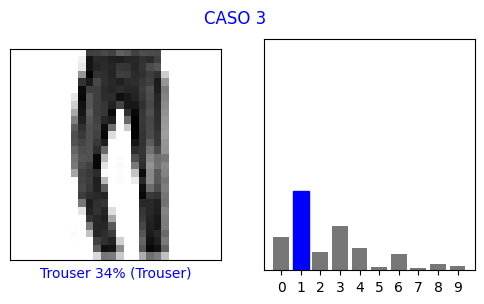

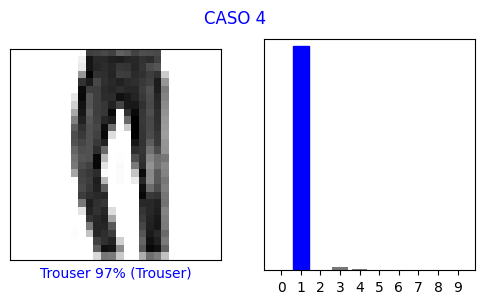

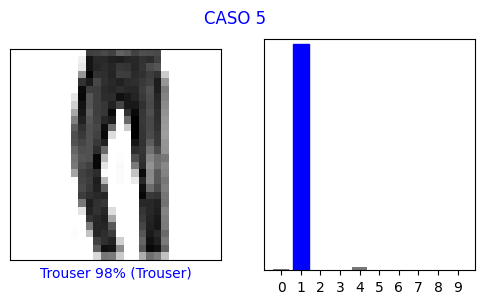

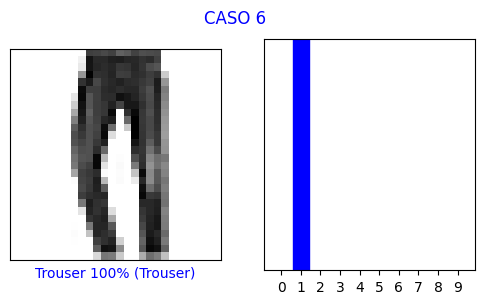

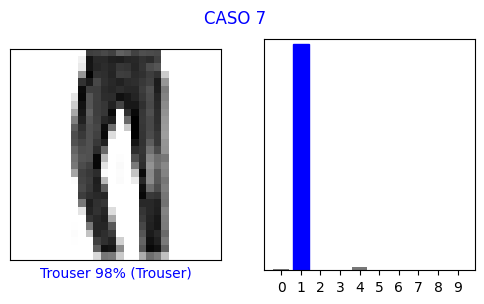

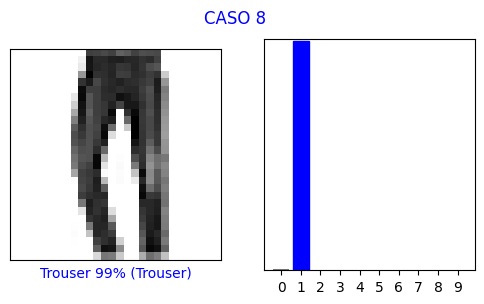

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Se itera a través de los 8 modelos y se realizan predicciones para la sexta
# imagen en test_images.
for i in range(1, 9):
    model = locals()['net' + str(i)]

    # Se realiza una predicción con el modelo actual para la sexta imagen en
    # test_images.
    predictions = model.predict(test_images[5].reshape(1, 28 * 28))

    plt.figure(figsize=(6, 3))

    # Se escribe el caso al que corresponde cada gráfico.
    plt.suptitle(f"CASO {i}", fontsize=12, color='blue')

    # Se muestra la imagen.
    plt.subplot(1, 2, 1)
    plot_image(5, predictions[0], test_labels, test_images)

    # Se muestra el arreglo de valores.
    plt.subplot(1, 2, 2)
    plot_value_array(5, predictions[0], test_labels)

plt.show()

La sexta imagen es un pantalón y los ocho casos lo predicen. Todos con una probabilidad muy alta (normalmente superior al 95%) a excepción del tercer caso, donde la probabilidad suele ser inferior al 50%. Se confunde con otras prendas de ropa como por ejemplo el vestido. El caso 3 es el de 10 neuronas, 'sigmoid' como función de activación y optimizador 'sgd'. Para esta imagen, el segundo peor caso sería el 7, que es igual que el 3 pero con 512 neuronas.

Acontinucación, se van a comparar los 8 modelos teniendo en cuenta las 10 primeras imágenes. Van a aparecer los modelos (uno por uno) por orden y las imágenes de 10 en 10.


CASO 1:
1/1 [==============================] - 0s 20ms/step


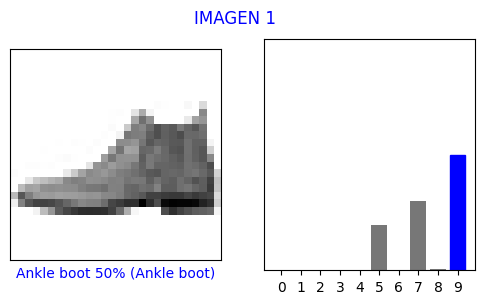

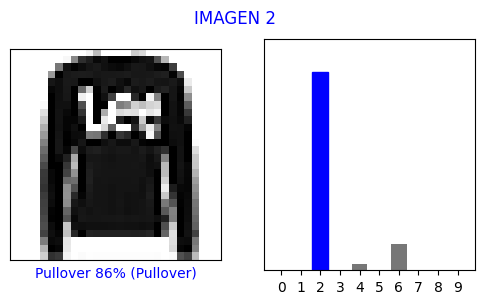

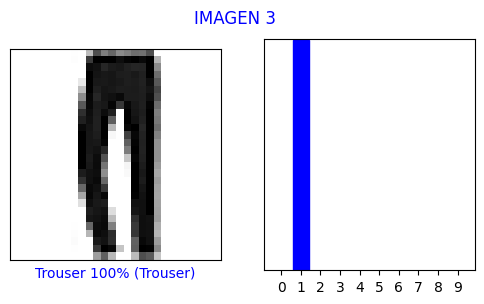

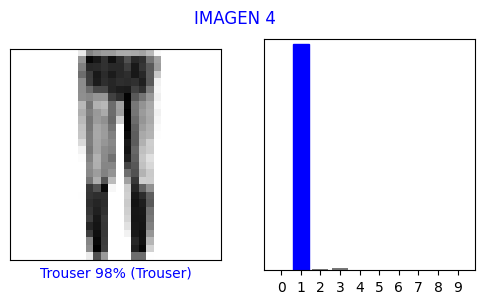

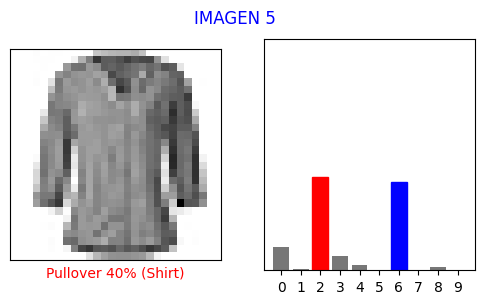

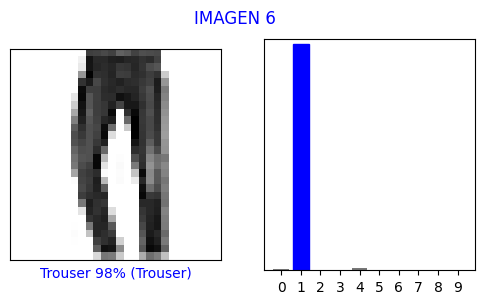

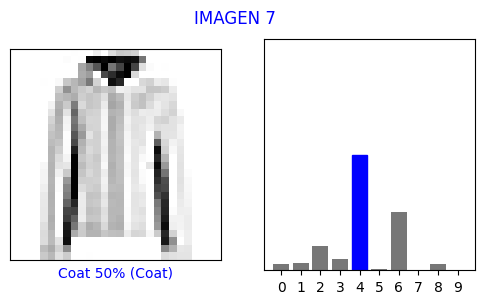

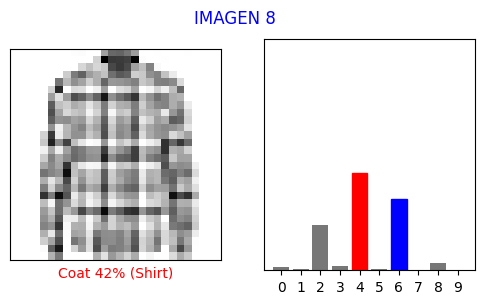

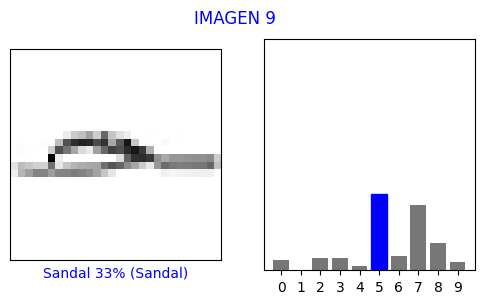

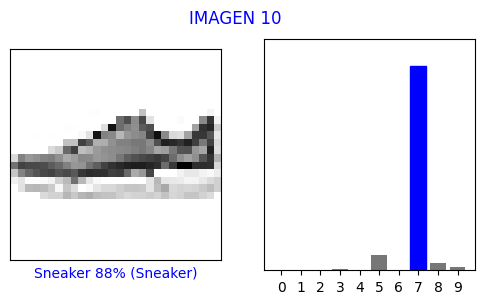


CASO 2:
1/1 [==============================] - 0s 26ms/step


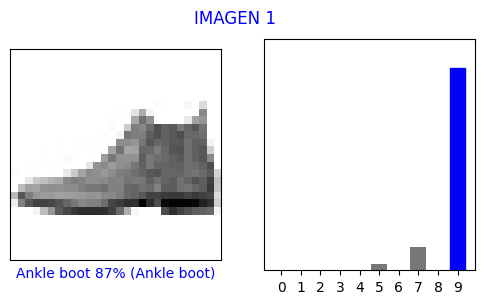

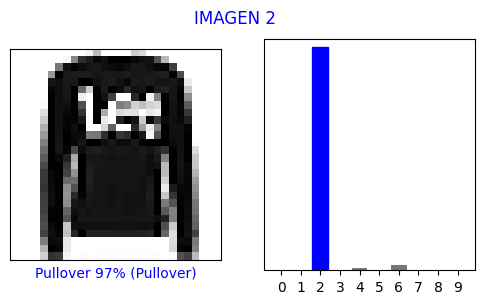

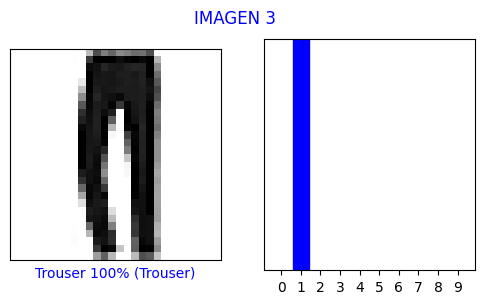

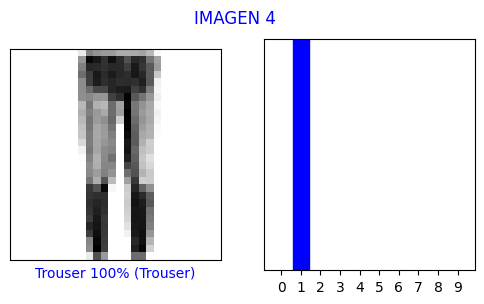

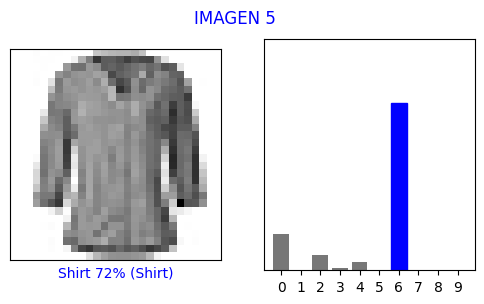

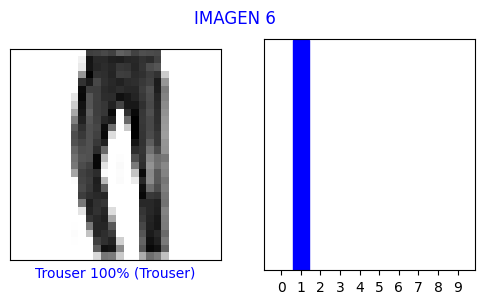

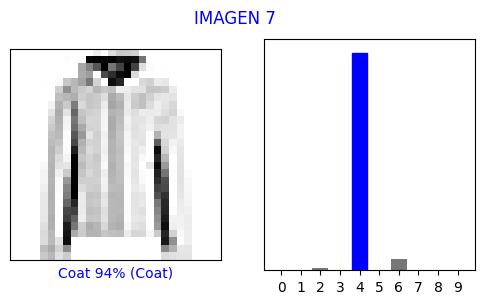

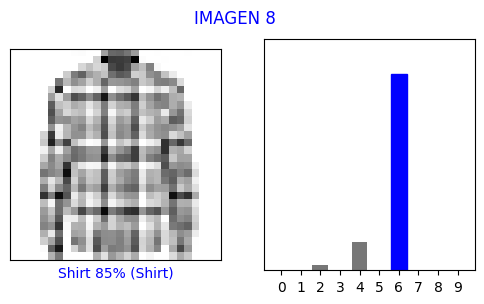

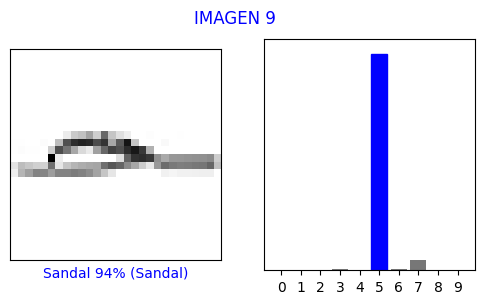

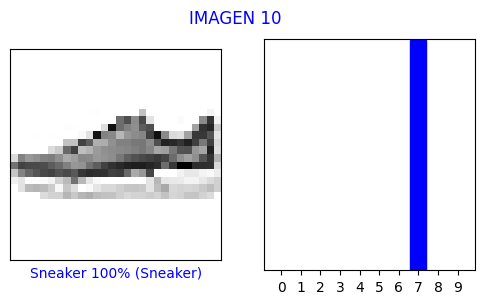


CASO 3:
1/1 [==============================] - 0s 18ms/step


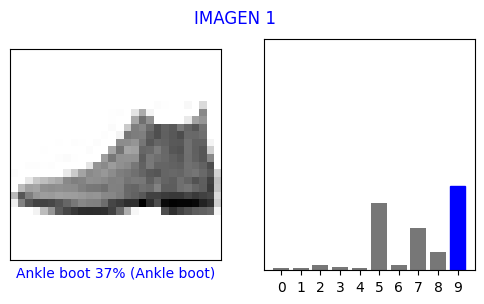

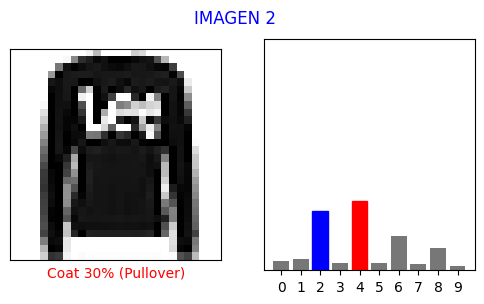

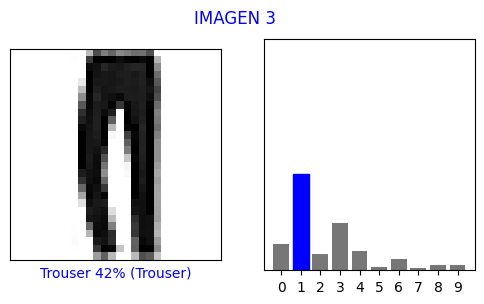

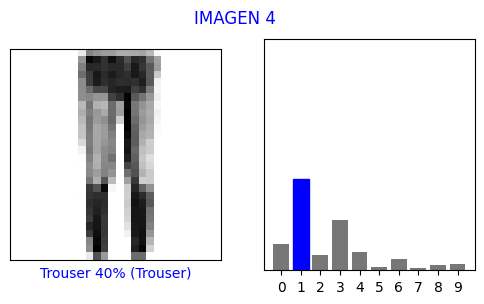

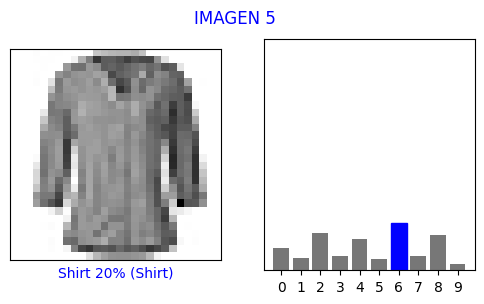

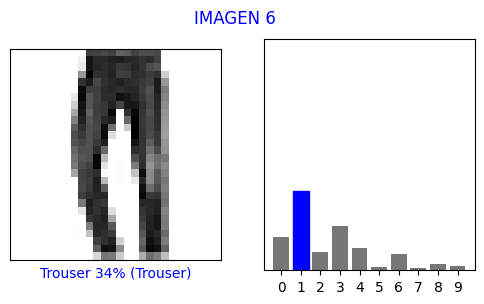

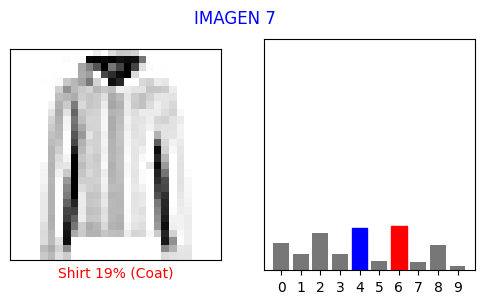

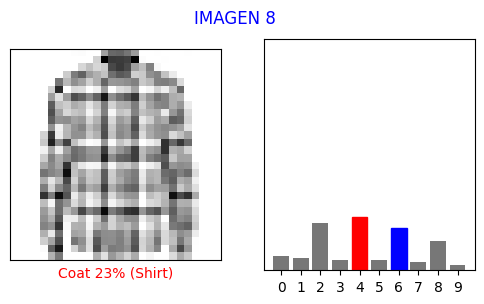

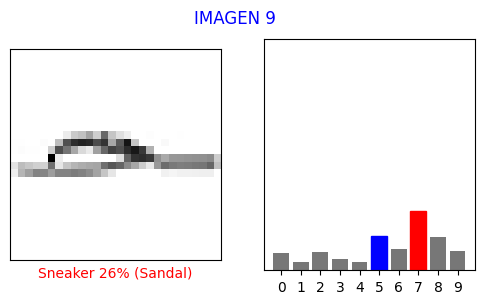

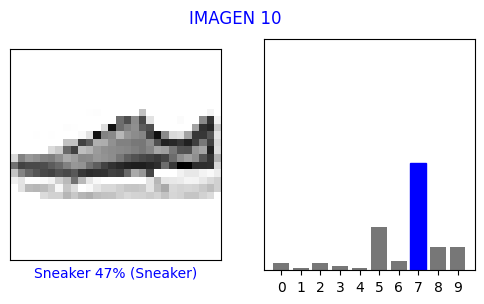


CASO 4:
1/1 [==============================] - 0s 23ms/step


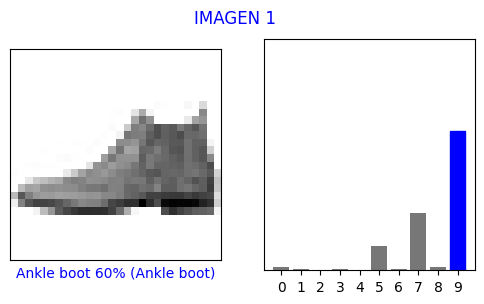

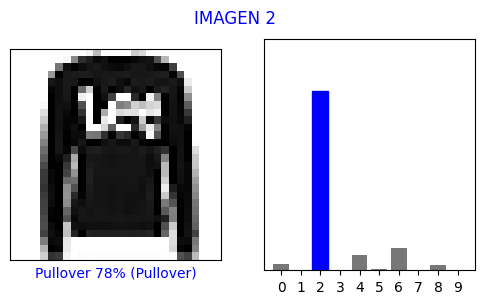

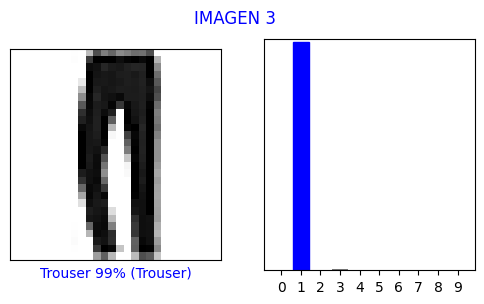

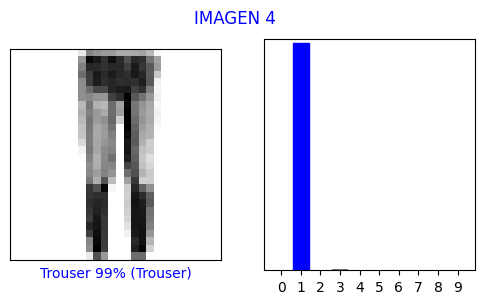

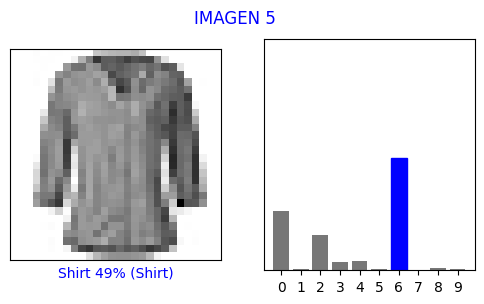

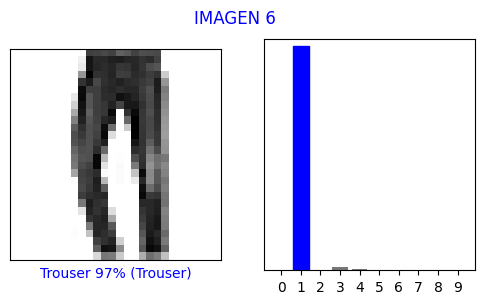

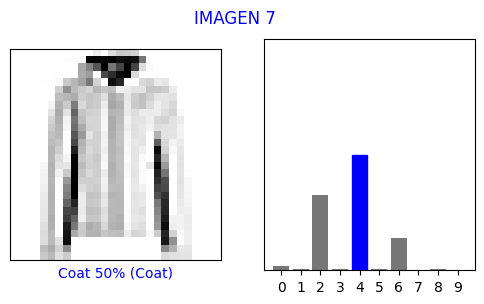

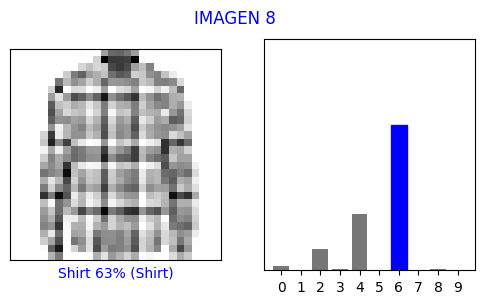

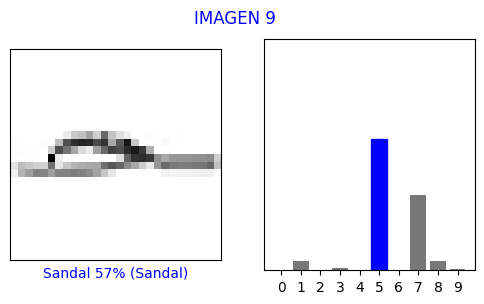

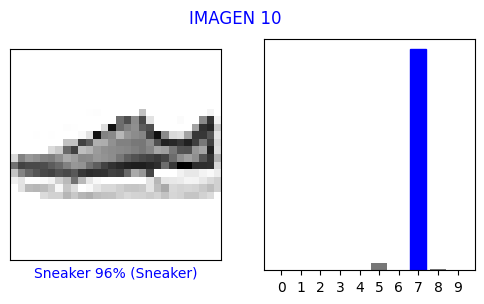


CASO 5:
1/1 [==============================] - 0s 18ms/step


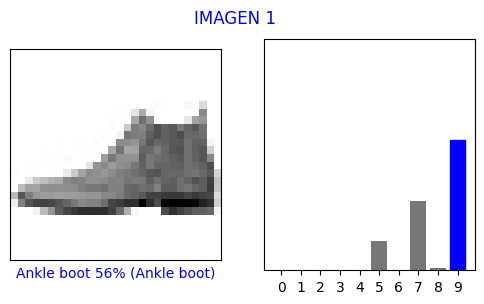

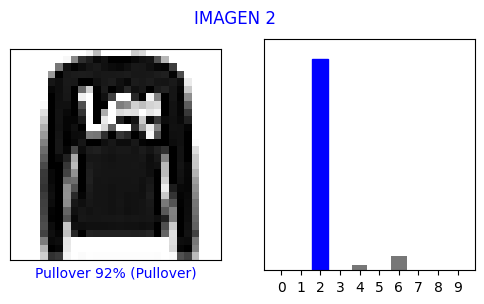

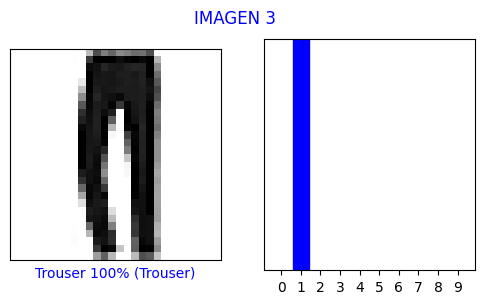

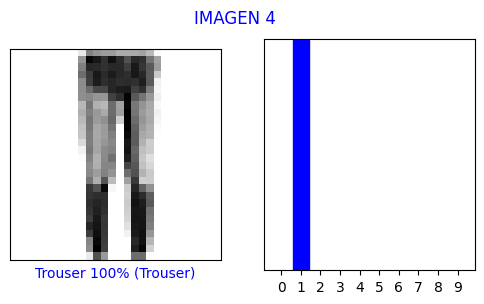

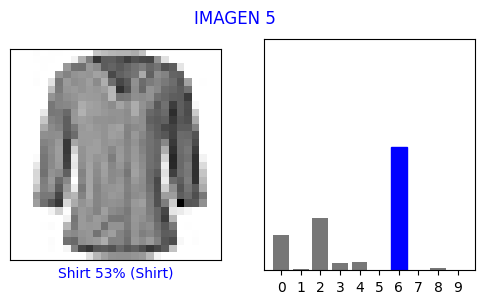

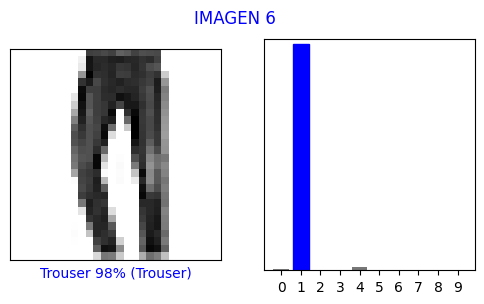

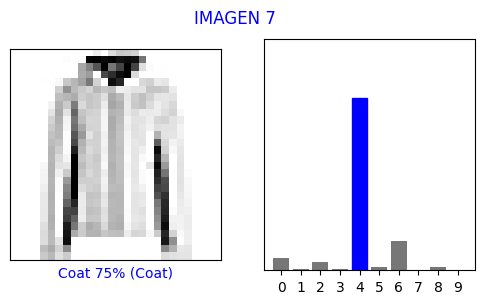

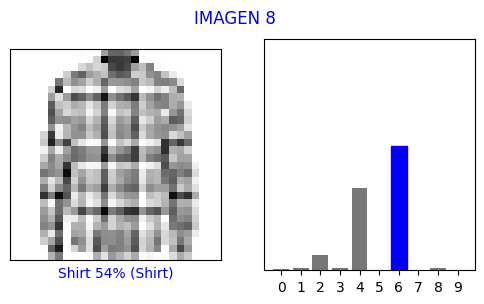

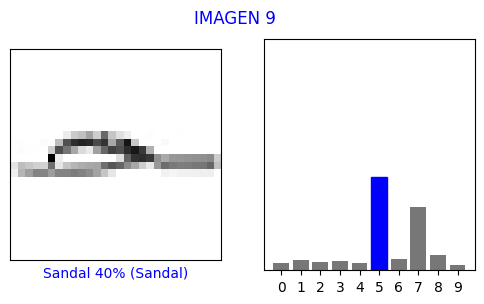

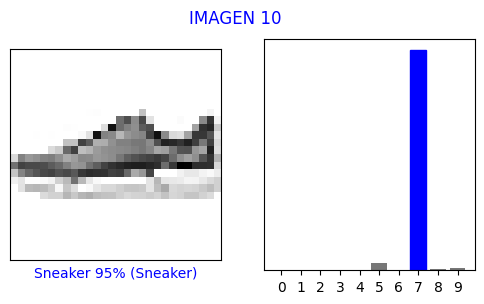


CASO 6:
1/1 [==============================] - 0s 26ms/step


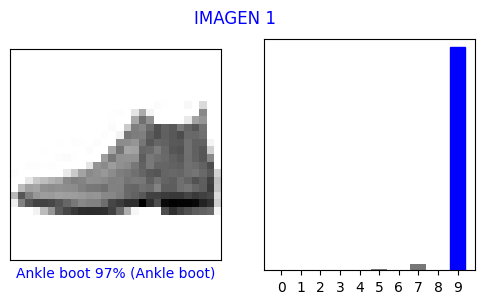

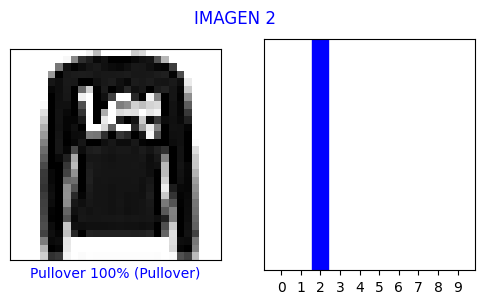

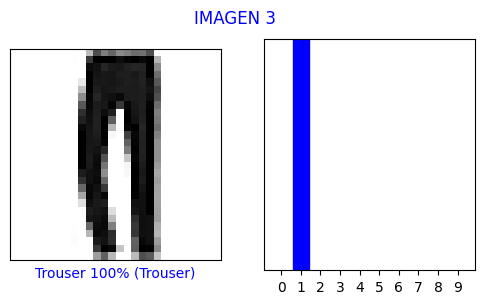

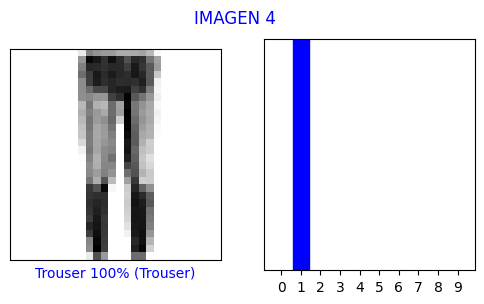

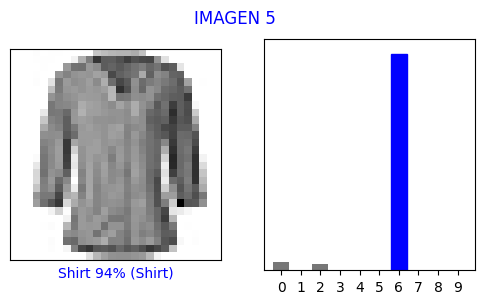

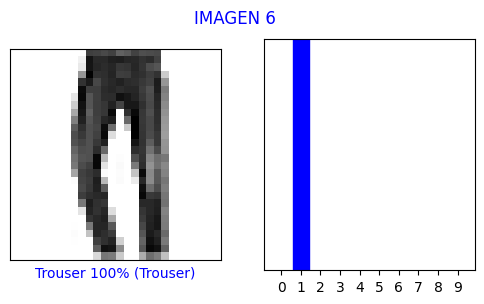

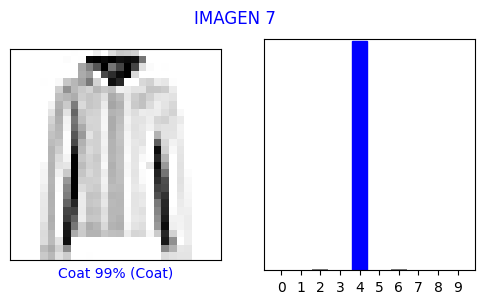

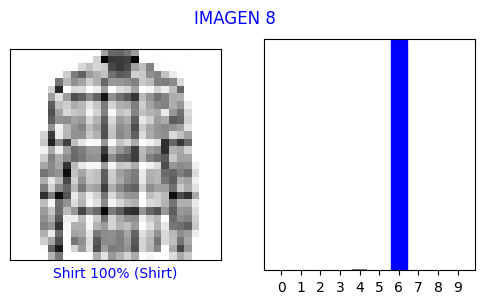

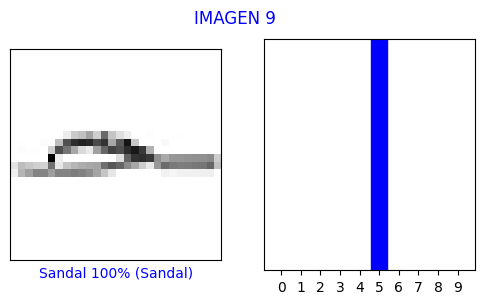

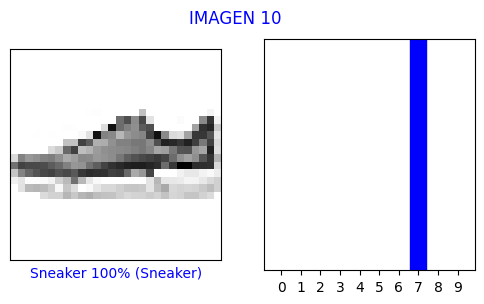


CASO 7:
1/1 [==============================] - 0s 17ms/step


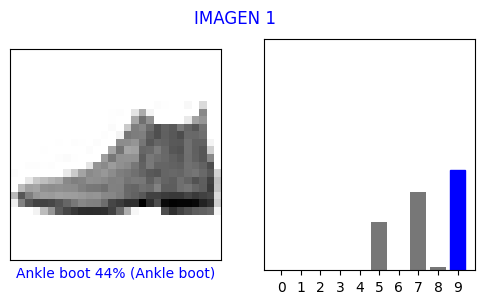

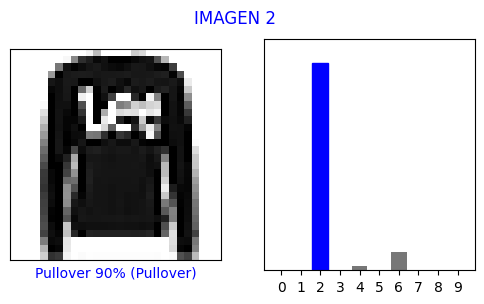

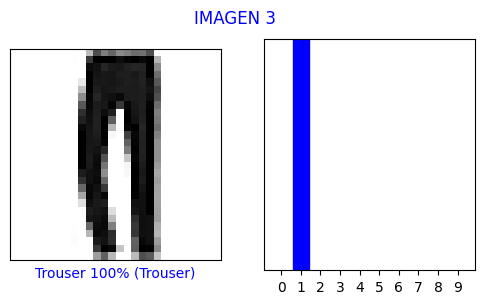

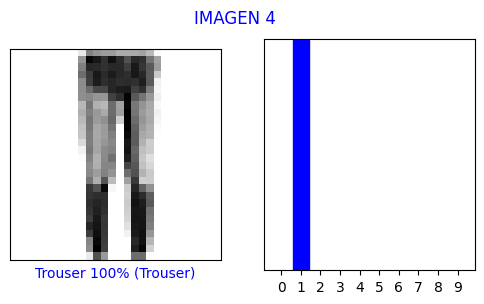

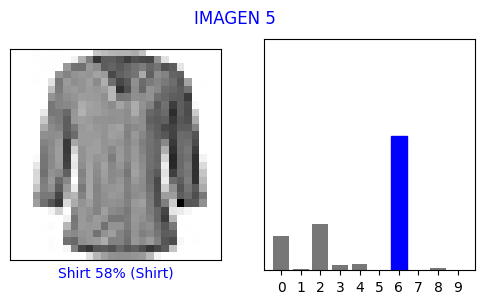

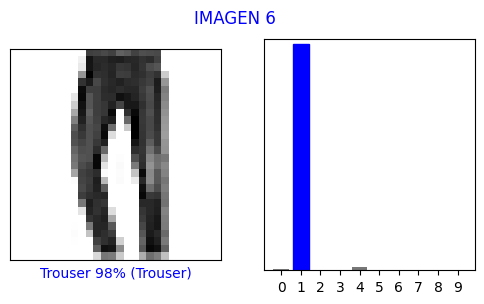

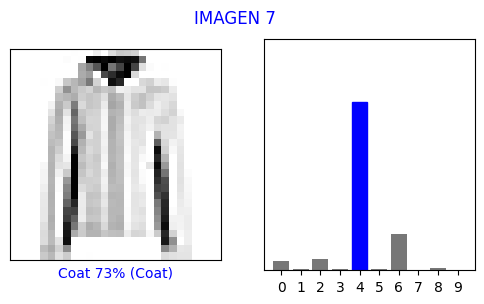

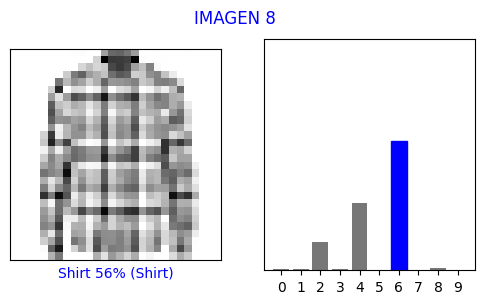

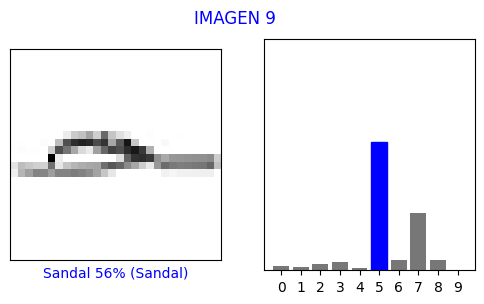

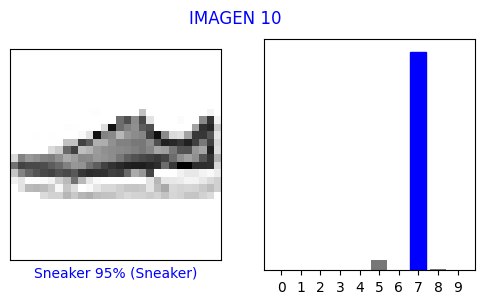


CASO 8:
1/1 [==============================] - 0s 23ms/step


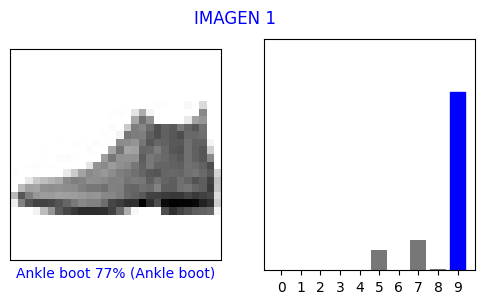

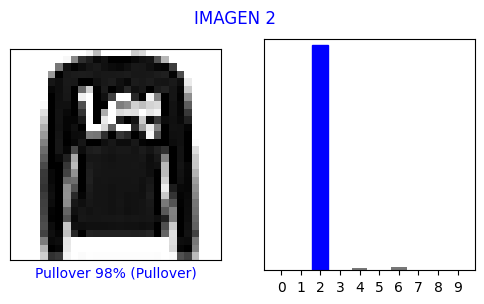

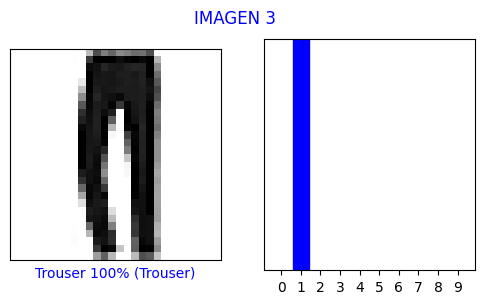

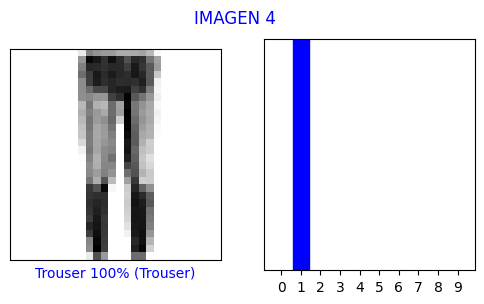

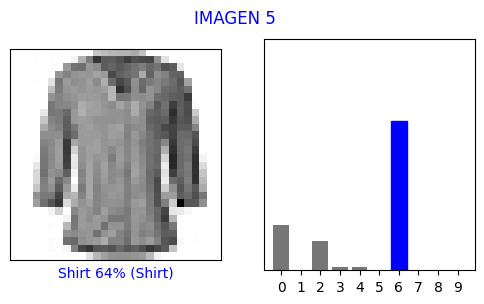

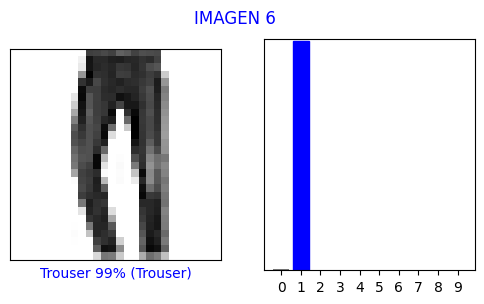

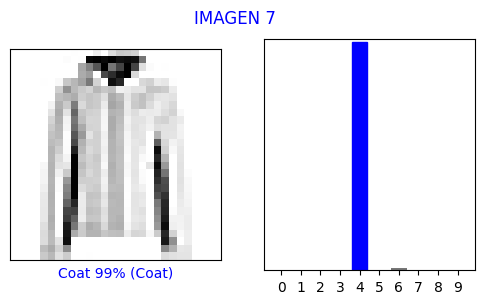

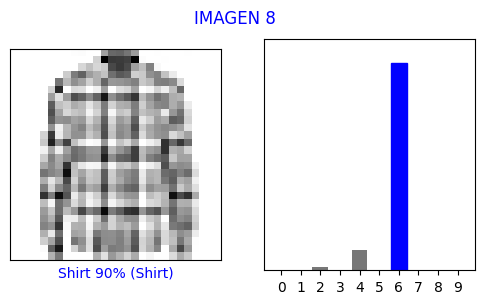

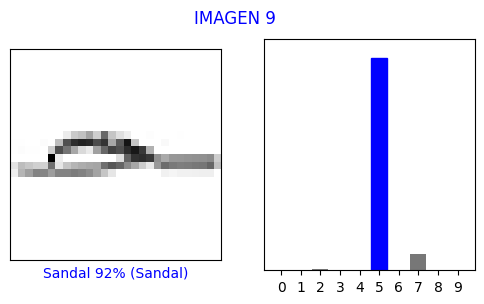

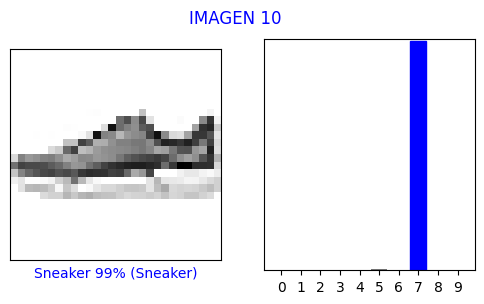

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Se itera a través de los 8 modelos.
for i in range(1, 9):
    model = locals()['net' + str(i)]
    print(f"\nCASO {i}:")

    # Se itera a través de las primeras 10 imágenes de prueba.
    for j in range(10):
        predictions = model.predict(test_images[j].reshape(1, 28 * 28))

        plt.figure(figsize=(6, 3))

        # Se escribe el caso al que corresponde cada gráfico.
        plt.suptitle(f"IMAGEN {j+1}", fontsize=12, color='blue')

        # Se muestra la imagen.
        plt.subplot(1, 2, 1)
        plot_image(j, predictions[0], test_labels, test_images)

        # Se muestra el arreglo de valores.
        plt.subplot(1, 2, 2)
        plot_value_array(j, predictions[0], test_labels)

    plt.show()

El caso 8 es muy preciso, lo que más falla es la bota(imagen 1) y la camiseta(imagen 5).

El caso 7 puede confundir y llegar a equivocarse puntualmente en las imágenes 1-5-7-8 ya que la probabilidad suele ser inferior al 50%. También se debe destacar la mala probabilidad de la sandalia(imagen 9).

El caso 6 es un modelo muy preciso, el dato al que peor se ajusta es el de la camiseta(imagen 5).

En el caso 5, la sandalia(imagen 9) y camiseta(imagen 5) poco precisos, rondando el 50%. Las imágenes 7-8-1 tampoco son muy buenas, son del 60% aproximadamente. Siempre depende de los pesos aleatorios así que puede variar dependiendo de la ejecución del código.

En el caso 4 flojean las imágenes 1-5-7-8-9. Pese a que hay poca probabilidad de que falle en varias podría equivocarse en una.

El caso 3 es muy malo (el peor de todos). Las imágenes 3-4-6-10 son las que mejor se predicen, y aún así la probabilidad es mala. Se suelen fallar varias predicciones. Por ejemplo, en la última realizada se ha equivocado en las  imágenes 5-7-8-9.

El caso 2 es muy bueno, todas las probabilidades son altas. La que menos la camiseta(imagen 5).

Los casos 2 y 6 son muy similares, el 2 tiene 10 neuronas en la primera capa y el 6 tiene 512, ambos tienen 'relu' como función de activación y 'rmsprop' como optimizador.

El caso 1 no es muy bueno, podría fallar las imágenes 1-5-8-9.

En general, las imágenes de la bota(imagen 1) y las dos camisetas (la 5 y la 8) tienen un porcentaje de predicción inferior en comparación a las otras 7 imágenes.

### Apartado 7:

Para el último apartado, se requiere utilizar el optimizador 'Adam' y la función de pérdida 'sparse_categorical_crossentropy' para el caso 3 y comparar los resultados con el caso 3 original que utiliza como optimizador 'sgd' y como función de pérdida 'categorical_crossentropy'.

El optimizador 'Adam' es un algoritmo que combina mejoras del optimizador 'rmsprop' y Momentum, teniendo en cuenta que 'rmsprop' converge a un mínimo de forma más rápida que 'sgd' y que 'Adam' es una versión mejorada de 'rmsprop' se espera que 'Adam' se mucho más eficiente que 'sgd'. Resulta que 'Adam' ajusta los parámetros individualmente teniendo en cuenta su gradiente y su momento.

Por otro lado, la función de pérdida 'sparse_categorical_crossentropy' utiliza la misma función que 'categorical_crossentropy' pero el formato de las variables de entrada es en lo que las dos se diferencian. Para 'categorical_crossentropy' se hace uso de datos de entrada en formato one-hot encoding, es decir, datos con codificación binaria como [1,0] o [0,1]. En cambio, para 'sparse_categorical_crossentropy' se hace uso de datos codificados como enteros, si se tiene una clasificación de tres objetos sería [1],[2],[3]. Dependiendo del formato de los datos de entrada se hace uso de una u otra función de pérdida.

Función de pérdida que hace uso 'sparse_categorical_crossentropy' y 'categorical_crossentropy':

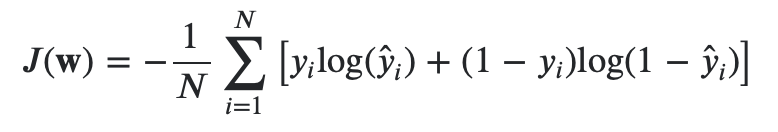

Donde W representa los pesos, Yi la variable verdadera y Y^ variable predicha.

A continuación comparamos resultados del caso 3 original con el de su variación:

In [14]:
 # Resultados del entrenamiento.

 print(f'\n\nCASO 3:\n')
 print(f'Número de neuronas 10, función de activación sigmoid',
  f', optimizador Adam y función de pérdida sparse_categorical_crossentropy.\n')

 net31 = models.Sequential()# Creamos un modelo secuencial.

  # Añadimos una capa densa de neuronas con un número de 10 o 512 de las mismas
  # y una función de activación según el tipo de caso.
 net31.add( layers.Dense(10, activation = 'sigmoid',
                                   input_shape = (28 * 28,)) )

  # Creamos la capa de 10 neuronas de salida con función de activación softmax
  # ya que buscamos que los resultados que nos devuelva cada neurona sea la
  # probabilidad de haber reconocido un tipo de prenda u otro, 10 neuronas por
  # cada tipo de prenda. La suma de los valores de las neuronas debe ser igual
  # a uno.
 net31.add( layers.Dense(10, activation = 'softmax') )

  # Función que devuelve el número de parámetros utilizados en cada red
  # neuronal.
 net31.summary()

  # Función que llama al optimizador y a la función de pérdida que ajustará los
  # pesos, solo se tendrá en cuenta las predicciones correctas, métrica de
  # precisión.
 net31.compile( optimizer = 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'] )

  # Se entrena a la red neuronal con las imágenes de entrenamiento junto con sus
  # respectivas etiquetas, se ajustan los pesos cada 128 imágenes. Una vez
  # se ha entrenado con todas las imágenes, el proceso se repite 5 veces.
  # Además, se hace uso de la etiqueta de entrenamiento 'y_train' que no se
  # encuentra en one hot encoding para que la función de pérdida pueda
  # funcionar.
 net31.fit( train_images, y_train, epochs = 5,
                             batch_size = 128 )



CASO 3:

Número de neuronas 10, función de activación sigmoid , optimizador Adam y función de pérdida sparse_categorical_crossentropy.

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                7850      
                                                                 
 dense_21 (Dense)            (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.4662 - accuracy: 0.6124
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.9064 - accuracy: 0.7607
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.7047

In [15]:
# Resultados del test.

print(f'\n\nCASO 3:\n')
print(f'Número de neuronas 10, función de activación sigmoid',
  f', optimizador Adam y función de pérdida sparse_categorical_crossentropy.\n')

# Función que evalua la precisión con que la red neuronal reconoce el tipo de
# prenda de el conjunto de datos de prueba. Además, se llama a la variable
# 'y_test' que son el nombre de las etiquetas de los datos de prueba que no se
# encuentran en one hot enconding.
test_loss, test_acc = net31.evaluate(test_images,y_test)

print('\nPérdida en la prueba:', test_loss)
print('Precisión en la prueba:', test_acc)



CASO 3:

Número de neuronas 10, función de activación sigmoid , optimizador Adam y función de pérdida sparse_categorical_crossentropy.

313/313 [==============================] - 1s 2ms/step - loss: 0.5458 - accuracy: 0.8245

Pérdida en la prueba: 0.5457667708396912
Precisión en la prueba: 0.8245000243186951


**Resultados**:

El caso 3 original que usa optimizador 'sgd' y función de pérdida 'categorical_crossentropy' tanto en el entrenamiento como en la prueba la precisión se encuentra alrededor del 67%, mientras que cuando se utiliza el optimizador 'Adam' y función de pérdida 'sparse_categorical_crossentropy' los procentajes de precisión aumentan considerablemente tanto en el entrenemaineto como en la prueba, ambos alrededor del 83%.

Como ya se presuponía, la mejora no es debida exclusivamente por la función de pérdida ya que ambos utilizan la misma función pero con valores de entrada en diferentes formatos sino por el optimizador. Como se mencionó, el optimizador 'Adam' es mucho más eficiente en el reajuste de los pesos que 'sgd', por ello la red converge mejor.

# **Conclusión**

Durante el inicio de la práctica nos encargamos de buscar la información necesaria de antemano para poder comprender los problemas que necesitabamos resolver. Además, queríamos no solo saber sino entender el funcionamiento de las diferentes funciones de activación, optimizadores y funciones de pérdida utilizadas durante el transcurso de nuestro trabajo.

Una vez entendidos los funcionamientos y conceptos, nos explicábamos entre nosotros lo que habíamos comprendido, empezamos la práctica. Decidimos dividirla en dos bloques, Joaquin se encargaba de los apartados del 1 al 3 y Adrián del 4 al 6, el 7 lo hicimos conjuntamente. Una vez hecho cada uno de los apartados, nos poníamos al día de qué había hecho cada uno en su tarea para que ambos entendiéramos todos los resultados y conclusiones extraídas.

Por último, cuando acabamos todos los apartados, decidimos darle una repasada conjuntamente al trabajo para comprobar faltas de ortografía, mejorar las explicaciones y ultimar detalles de código.

# **Bibliografía**

Cross entropy vs. sparse cross entropy: When to use one over the other. (s. f.). Cross Validated. https://stats.stackexchange.com/questions/326065/cross-entropy-vs-sparse-cross-entropy-when-to-use-one-over-the-other

What is the role of «Flatten» in Keras? (s. f.). Stack Overflow. https://stackoverflow.com/questions/43237124/what-is-the-role-of-flatten-in-keras

Keras - flatten layers. (s. f.). https://www.tutorialspoint.com/keras/keras_flatten_layers.htm

De Los Datos, E. M. (2021, 17 enero). Técnicas para codificar las variables categóricas (I): codificación ordinal y one-hot. El mundo de los datos. https://elmundodelosdatos.com/tecnicas-para-codificar-variables-categoricas-ordinal-one-hot/

IBM documentation. (s. f.). https://www.ibm.com/docs/es/spss-modeler/saas?topic=networks-neural-model

Velasco, L. (2021, 14 diciembre). Optimizadores en redes neuronales profundas: un enfoque práctico. Medium. https://velascoluis.medium.com/optimizadores-en-redes-neuronales-profundas-un-enfoque-pr%C3%A1ctico-819b39a3eb5
Python String – Replace character at specific position. (s. f.). https://pythonexamples.org/python-string-replace-character-at-specific-position/

 Entrenamiento de redes neuronales b) descenso de gradiente [logongas]. (s. f.). https://logongas.es/doku.php?id=clase:iabd:pia:2eval:tema07.backpropagation_descenso_gradiente
